In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.optimize import least_squares

In [2]:
from fft_2to1 import load_image, calc_radial_profile, binning_data, power_law, residuals, fit_power_law, plot_pix_scale

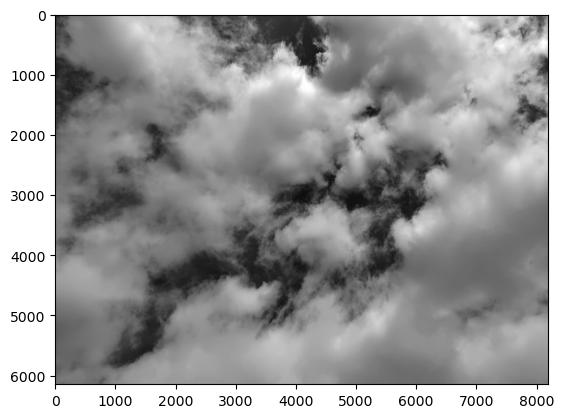

In [3]:
image = load_image('./kolmogorov_cloud.JPG')
plt.imshow(image, cmap='gray')

[ref. about the color conversion by cv2)](https://docs.opencv.org/4.2.0/de/d25/imgproc_color_conversions.html#color_convert_rgb_gray)

In [4]:
fft_image, freq, rprofile = calc_radial_profile(image)

In [5]:
fbin, rbin, err = binning_data(freq, rprofile, bin_size=5)
params, errors, chi2, dof, (fmin, fmax) = fit_power_law(fbin, rbin, err)

/Users/hironobu_nakata/workspace/hobby/fft2to1/fft_2to1.py:52: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)


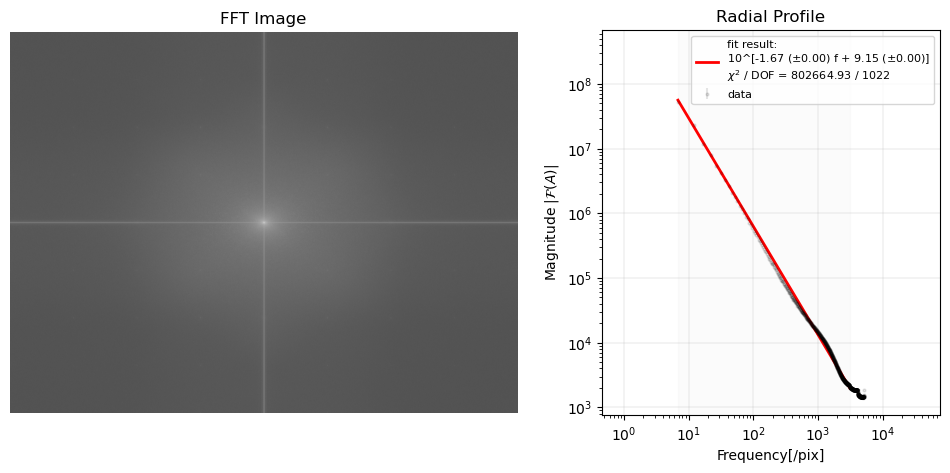

In [6]:
fig = plt.figure(figsize=(12, 5))
gs = GridSpec(1, 2, width_ratios=[3,2])
ax = []
ax.append(fig.add_subplot(gs[0]))
ax[0].imshow(np.log(np.abs(fft_image)), cmap='gray')
ax[0].set_title('FFT Image')
ax[0].axis('off')
ax.append(fig.add_subplot(gs[1]))
ax[1].set_title('Radial Profile')
_=plot_pix_scale(fbin, rbin, err, params, errors, chi2, dof, fmin, fmax, ax=ax[1])